# Линейная регрессия (и немного о корреляции)

Вспомним термины:

- **наблюдение / объект** &mdash; отдельный объект, про который нам известны одно или несколько значений переменных (какие-то характеристики объекта).  
  Сответствует *строчке* таблицы.
- **переменная** &mdash; параметр, который мы измеряли или узнавали про наши объекты.  
  Переменные это то, что бывает количественным и категориальным/бинарным.  
  Соответствует *столбцу* таблицы.
  
У наблюдений как правило будут разные значения переменных



В датасете про велосипеды наблюдением был определённый час дня, а про него известно например:
- температура за этот час
- скорость ветра
- день, дата, которой принадлежит этот час
- праздничный ли день
- количество отданных в прокат велосипедов, отдельное для двух прокатных центров
- ... (и другое)
- (и то, какой это, собственно, час дня! &mdash; `Hour`) 

Это всё переменные!

In [140]:
import numpy as np
import pandas as pd

bikes = pd.read_csv("data/BikeData.csv")

bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38


- ❓ Если мы рассуждаем об изменении во времени популяции куниц, то что будет наблюдением, а что переменными?  
  - Есть ли переменные *постоянные*, не меняющиеся год к году?

- ❓ Если мы рассуждаем о титанике, то что будет наблюдением, а что переменными?  

## Понимание базовое: формула, связывающая несколько переменных

Можно придумать формулу, которая свяжет количество сданных в прокат велосипедов в первом центре `Partner 1` с часом дня и температурой:

$\text{Partner 1} = 80 + 10 \times \text{Hour} + 2 \times \text{Temperature} $
 
кратко:

$\hat{Y} = 80 + 10 \times X + 2 \times Z $, где $X$ &mdash; час, $Z$ &mdash; температура, $Y$ &mdash; количество сданных в прокат велосипедов 

Здесь вышло, что мы **взяли одну переменную** (`Partner 1`) **как целевую / таргетную**, и **связали её с нескольми другими &mdash; признаками**.

Кроме того, мы использовали константу 80, это как бы начальный уровень, базовое число продаж. 

Термины:

- таргетная / целевая / зависимая переменная
- признак или регрессор или признаковая / объясняющая / независимая переменная
- **коэффициенты** &mdash; числа, всё кроме переменных (букв) из формулы

Можно в эту формулу что-то подставить и посчитать предполагаемое число велосипедов:

$80 + 10 \times 14 + 2 \times 15 = 250$ (столько велосипедов, по предположению формулы, будет сдано в прокат, в 14 дня при 15 градусах температуры.

❓ Как могут входить в формулу логические / бинарные переменные?

$\text{Partner 1} = 80 + 10 \times \text{Hour} - 40 \times \text{Holiday} $

`Holiday` &mdash; бинарная переменная и понимать надо так (когда выбрано, что у неё True, а что False): если `True` то это 1, если `False`, то 0 


$ 80 + 10 \times 16 - 40 \times 1  = 200 $  

❓ Как могут входить в формулу категориальные переменные?

(задания 12, 13, по 0,2 балла)

❓ Что в датасете про предметы искусства может быть целевой переменной и с какими признаками?

Есть хитрость, связанная с константными признаками:

по сути, такой признак всегда один.

Если мы бы задумали формулу, где количество сданных в прокат велосипедов зависит от
- времени суток (переменная), 
- близости стадиона (константный признак! Поскольку мы смотрим только один прокатный центр)
- и также есть базовый уровень сданных в прокат велосипедов (также константный признак)  


... то формула вышла бы например такая:

$\hat{Y} = 10 \times \text{Hour} + 80 + 10 $, где 80 &mdash; оценка базового числа сданных в прокат велосипедов, а 10 &mdash; оценка близости стадиона 

По сути здесь лишь один константный признак, равный $80 + 10 = 90$ 


## Понимание продвинутое: формула, связывающая несколько переменных, которую можно построить по имеющимся данным

коэффициенты / веса в формуле можно вычислить!

$$\hat{Y}_{𝑖} = \hat{𝑤}_{0} + \hat{𝑤}_{1} \times X_{𝑖} $$

Формулы для подсчёта весов:
    
$$\hat{𝑤}_{0} = \bar{𝑌} − \hat{𝑤}_{1}\bar{𝑋} $$

$$\hat{𝑤}_{1} = \frac{\sum((𝑋_{𝑖} − \bar{𝑋}) \times (𝑌_{𝑖} − \bar{𝑌} ))}{\sum(𝑋_{𝑖} − \bar{𝑋})^2}$$

Что это за обозначения?
- черточка сверху $\bar{◌}$ - среднее арифметическое
- крышечка сверху $\hat{◌}$ - предсказание
- ∑︀ - сумма того, что идёт после символа


термины:

к слову "регрессия" прибавляют прилагательное, указывающее, сколько коэффициентов в ней (считая константный $\hat{w}_0$):
- это ($\hat{Y}_{𝑖} = \hat{𝑤}_{0} + \hat{𝑤}_{1} \times X_{𝑖} $) **парная** регрессия
- чуть выше была **множественная** (больше двух коэффициентов, а именно 3): $\hat{Y} = 80 + 10 \times X + 2 \times Z $

продолжаем с парной:

In [141]:
import pandas as pd
import numpy as np

У нас есть данные. Допустим, сколько человек готовился к работе (X) и оценка (Y). 

<Axes: xlabel='X', ylabel='Y'>

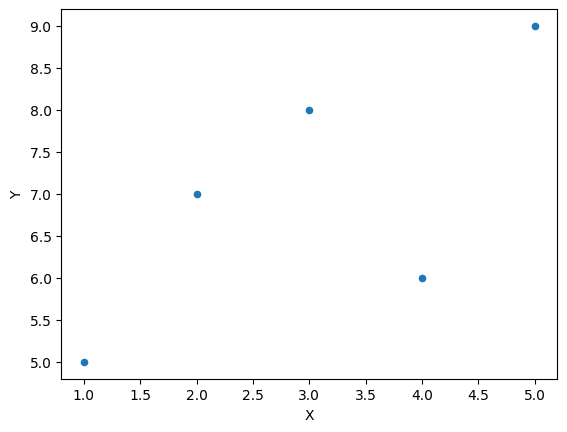

In [142]:
X = [3, 1, 4, 2, 5]
Y = [8, 5, 6, 7, 9]
data = pd.DataFrame()
data['X'] = X
data['Y'] = Y
data.plot('X', 'Y', kind='scatter')

О чём "линейная регрессия"? О том, что мы хотим найти примерную формулу для вычисления целевой (таргетной) переменной `Y` по имеющимся данным.

То есть здесь, зная время подготовки, хотим *предполагать* оценку.

(формула из методических материалов может казаться страшной, но смысл простой...)

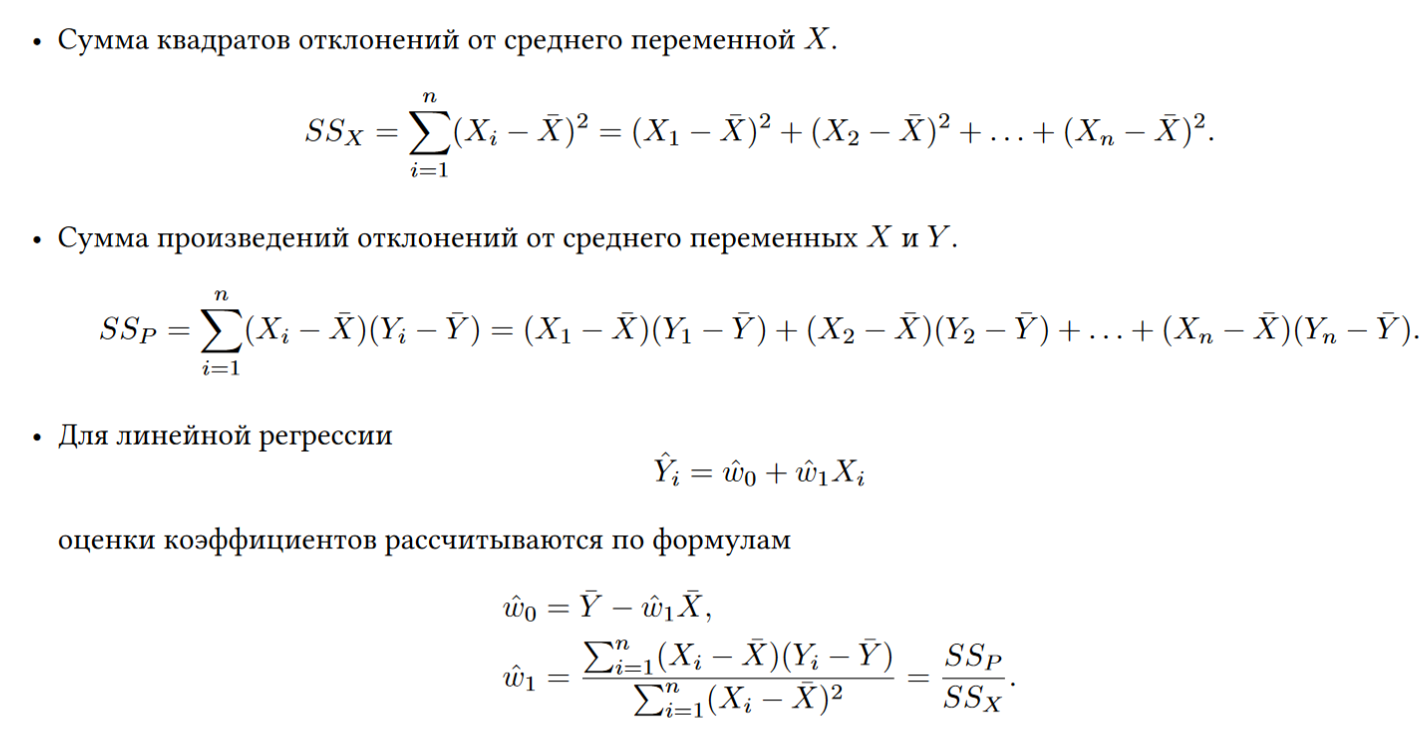

*Задание 18 &mdash; найти уравнение регрессии по таблице с данными (1 балл)*


In [143]:
X = np.array([3, 1, 4, 2, 5])
Y = np.array([8, 5, 6, 7, 9])
X_mean = X.mean()
Y_mean = Y.mean()
# открываем доп. материал к экзамену и переписываем формулы весов
w1 = ((X-X_mean)*(Y-Y_mean)).sum() / ((X-X_mean)**2).sum()
w0 = Y_mean - w1*X_mean
print(f'y = {w0} + {w1}*x')

y = 4.9 + 0.7*x


Вот мы получили формулу. По ней, если готовиться 7 часов, можно получить оценку 9.8.

(но вы готовьтесь больше)

In [144]:
new_x = 7
y = 4.9 + 0.7*new_x  # подставляем в формулу
y

9.8

Вот так выглядят наши точки вместе с предсказанной прямой

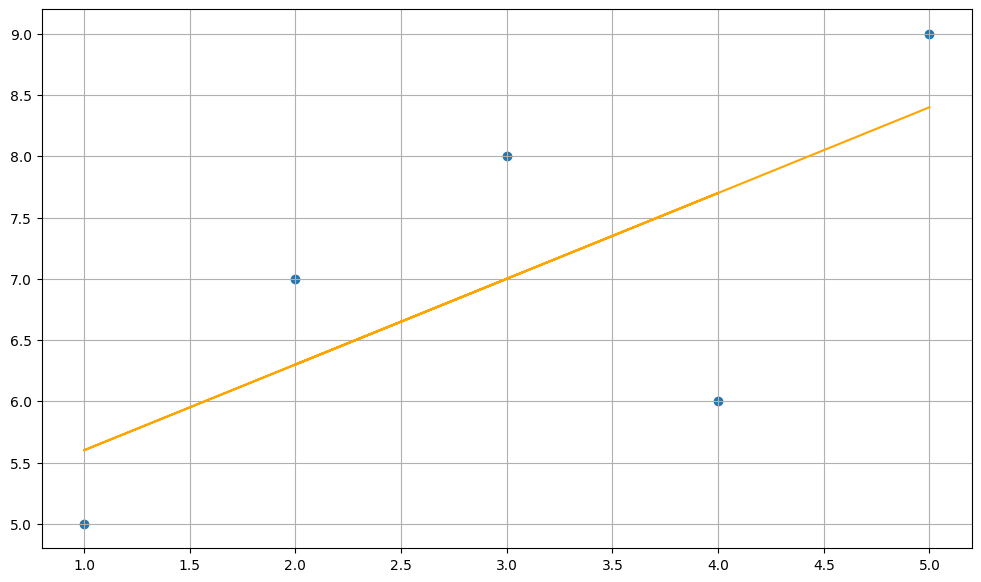

In [145]:
# это просто визуализация, вам можно этот код не смотреть
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 7))
plt.scatter(X, Y)  # данные
plt.plot(X, 4.9 + 0.7*X, color='orange')  # предсказание
plt.grid(True)

У нас получилось нарисовать линию регрессии, поскольку это парная регрессия, в уравнении лишь константа и $x$: $y = 4.9 + 0.7 x$

Формулу из начала, для велосипедов, на графике отобразить сложно, ведь там две объясняющих переменных (это уже нужны две оси на графике), и целевая (это ещё третья ось!).
    *(Но можно, график будет 3d, а регрессия будет не линией, а плоскостью)*

## Когда может вообще не выйти построить регрессию?

Уравнение прямой $y = w_0 + w_1 x$ предполагает, что если меняется $y$, то за счёт изменения $x$. 
    Если $x$ не меняется, то уравнения не построить

In [146]:
X = np.array([5, 5, 5, 5, 5])
Y = np.array([8, 5, 6, 7, 9])
X_mean = X.mean()
Y_mean = Y.mean()
# открываем доп. материал к экзамену и переписываем формулы весов
w1 = ((X-X_mean)*(Y-Y_mean)).sum() / ((X-X_mean)**2).sum()  # SSp / SSx
w0 = Y_mean - w1*X_mean
print(f'y = {w0} + {w1}*x')

y = nan + nan*x


C:\Users\фвьшт\AppData\Local\Temp\ipykernel_31956\1780543462.py:6: RuntimeWarning: invalid value encountered in scalar divide
  w1 = ((X-X_mean)*(Y-Y_mean)).sum() / ((X-X_mean)**2).sum()  # SSp / SSx


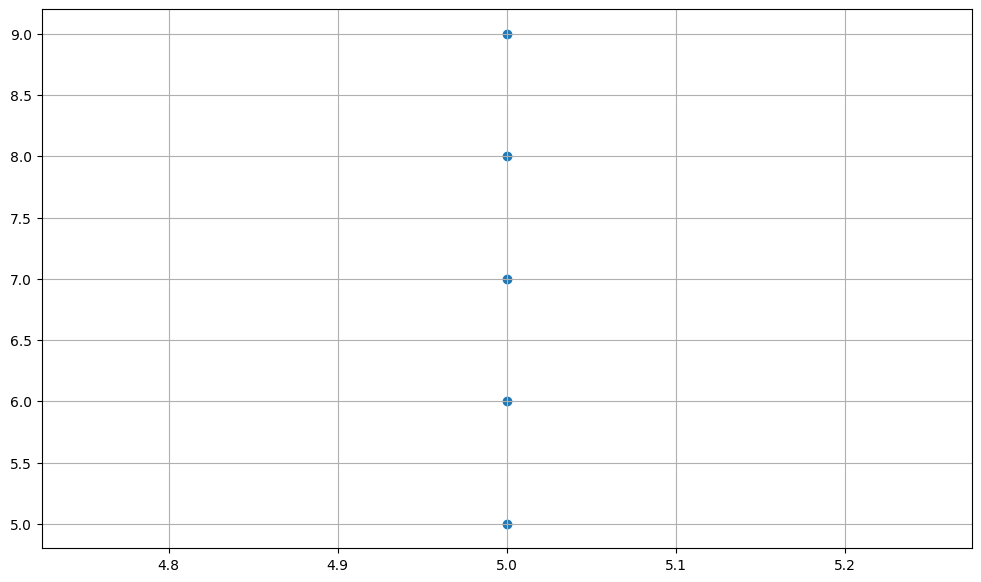

In [147]:
# это просто визуализация, вам можно этот код не смотреть
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 7))
plt.scatter(X, Y)  # данные
# предсказания нет..
plt.grid(True)

## Простой способ построения: 

In [148]:
import numpy as np
import scipy.stats

In [149]:
import scipy.stats
X = np.array([3, 1, 4, 2, 5])
Y = np.array([8, 5, 6, 7, 9])

res = scipy.stats.linregress(X, Y)

print(f"y = {res.intercept} + {res.slope}x")

y = 4.9 + 0.7000000000000001x


## Метрики для подсчёта качества линейной регрессии

`MSE` (mean squared error, среднеквадратичная ошибка) - сумма квадратов ошибок, поделённая на количество наблюдений

$ 𝑀𝑆𝐸 = \frac{\sum(𝑌_{𝑖} − \hat{𝑌}_{𝑖})^2}{𝑛} $

In [150]:
# Y, который дали  - Y реальный
# Y предсказанный? Предсказанный моделью, то есть нашей формулой
Y_pred = w0 + w1*X
Y_pred
MSE = ((Y-Y_pred)**2).mean()
MSE

nan

`MAE` (mean absolute error, средняя абсолютная ошибка) - сумма модулей ошибок, поделённая на количество наблюдений

$ 𝑀𝐴𝐸 =\frac{\sum|𝑌_{𝑖} − \hat{𝑌}_{𝑖}|}{𝑛} $

In [151]:
MAE = (np.abs(Y-Y_pred)).mean()
MAE

nan

**По этим ошибкам нельзя сказать, хорошая модель или нет**. Но если у нас есть несколько моделей, которые мы проверяем на одних данных, можно сравнить ошибки (MSE с MSE, например) и сделать выводы. Чем меньше ошибка, тем лучше.

### Корреляция

Корреляция тоже может считаться по формуле из методических материалов, а может проще.

Вот по формуле:

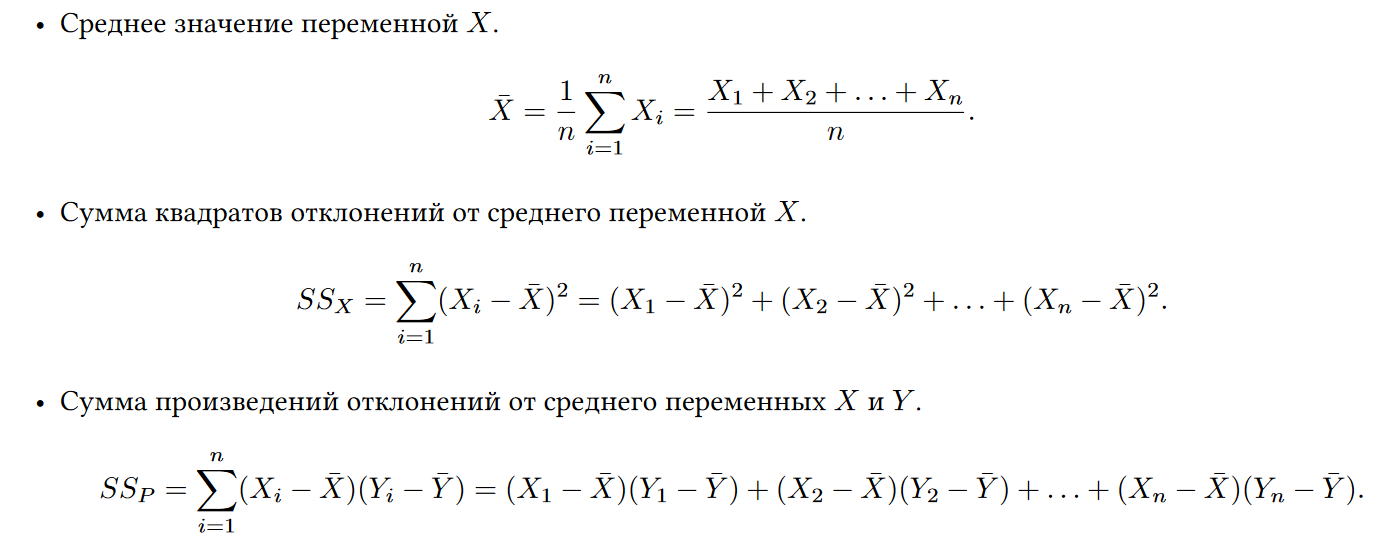

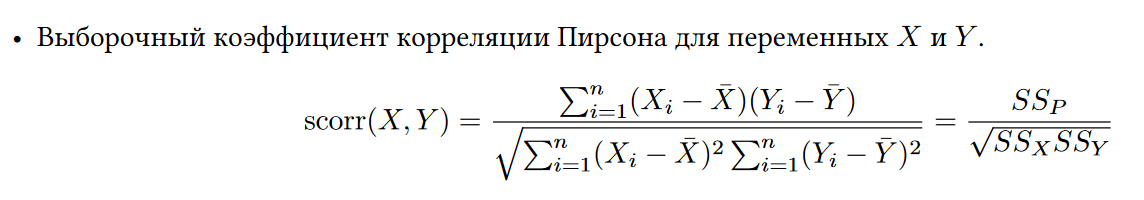

In [152]:
# те же данные

X = np.array([3, 1, 4, 2, 5])
Y = np.array([8, 5, 6, 7, 9])

X_mean = X.mean()
Y_mean = Y.mean()

r = ((X - X_mean) * (Y - Y_mean)).sum() / np.sqrt(((X - X_mean) ** 2).sum() * ((Y - Y_mean) ** 2).sum())

print(r)

0.7


Простой способ с `numpy`:

In [153]:
np.corrcoef(X, Y)

array([[1. , 0.7],
       [0.7, 1. ]])

Простой способ с `pandas.DataFrame`

In [154]:
bikes[["Temperature", "Hour", "Humidity", "Partner 1"]]

,Temperature,Hour,Humidity,Partner 1
0,-5.2,0,37,207
1,-5.5,1,38,139
2,-6.0,2,39,22
3,-6.2,3,40,43
4,-6.0,4,36,59
...,...,...,...,...
8755,4.2,19,34,467
8756,3.4,20,37,296
8757,2.6,21,39,571
8758,2.1,22,41,171


In [155]:
bikes[["Temperature", "Hour", "Humidity", "Partner 1"]].corr()

,Temperature,Hour,Humidity,Partner 1
Temperature,1.000000,0.123090,0.161933,0.409111
Hour,0.123090,1.000000,-0.241644,0.314558
Humidity,0.161933,-0.241644,1.000000,-0.149301
Partner 1,0.409111,0.314558,-0.149301,1.000000


но если попробовать посчитать корреляции всего со всем, то будет ошибка

In [156]:
bikes.corr()

ValueError: could not convert string to float: '01/12/2017'

Хитрость: можно найти корреляции между всеми числовыми столбцами.
Для этого нужно выбрать столбцы по типу данных

In [159]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Hour             8760 non-null   int64  
 2   Temperature      8581 non-null   float64
 3   Humidity         8760 non-null   int64  
 4   Wind speed       8760 non-null   float64
 5   Rainfall         8760 non-null   float64
 6   Snowfall         8760 non-null   float64
 7   Seasons          8760 non-null   object 
 8   Holiday          8760 non-null   object 
 9   Functioning Day  8760 non-null   object 
 10  Partner 1        8760 non-null   int64  
 11  Partner 2        8760 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 821.4+ KB


In [ ]:
help(bikes.select_dtypes)

Help on method select_dtypes in module pandas.core.frame:

select_dtypes(include=None, exclude=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return a subset of the DataFrame's columns based on the column dtypes.
    
    Parameters
    ----------
    include, exclude : scalar or list-like
        A selection of dtypes or strings to be included/excluded. At least
        one of these parameters must be supplied.
    
    Returns
    -------
    DataFrame
        The subset of the frame including the dtypes in ``include`` and
        excluding the dtypes in ``exclude``.
    
    Raises
    ------
    ValueError
        * If both of ``include`` and ``exclude`` are empty
        * If ``include`` and ``exclude`` have overlapping elements
        * If any kind of string dtype is passed in.
    
    See Also
    --------
    DataFrame.dtypes: Return Series with the data type of each column.
    
    Notes
    -----
    * To select all *numeric* types, use ``np.number

In [164]:
numeric_cols_bikes = bikes.select_dtypes(exclude="object")
numeric_cols_bikes

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Partner 1,Partner 2
0,0,-5.2,37,2.2,0.0,0.0,207,50
1,1,-5.5,38,0.8,0.0,0.0,139,80
2,2,-6.0,39,1.0,0.0,0.0,22,140
3,3,-6.2,40,0.9,0.0,0.0,43,105
4,4,-6.0,36,2.3,0.0,0.0,59,38
...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,0.0,0.0,467,177
8756,20,3.4,37,2.3,0.0,0.0,296,63
8757,21,2.6,39,0.3,0.0,0.0,571,665
8758,22,2.1,41,1.0,0.0,0.0,171,457


In [165]:
numeric_cols_bikes.corr()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Partner 1,Partner 2
Hour,1.000000,0.123090,-0.241644,0.285197,0.008715,-0.021516,0.314558,0.301520
Temperature,0.123090,1.000000,0.161933,-0.037797,0.050167,-0.220160,0.409111,0.402664
Humidity,-0.241644,0.161933,1.000000,-0.336683,0.236397,0.108183,-0.149301,-0.151990
Wind speed,0.285197,-0.037797,-0.336683,1.000000,-0.019674,-0.003554,0.087161,0.086745
Rainfall,0.008715,0.050167,0.236397,-0.019674,1.000000,0.008500,-0.092278,-0.092201
Snowfall,-0.021516,-0.220160,0.108183,-0.003554,0.008500,1.000000,-0.106401,-0.108967
Partner 1,0.314558,0.409111,-0.149301,0.087161,-0.092278,-0.106401,1.000000,0.587846
Partner 2,0.301520,0.402664,-0.151990,0.086745,-0.092201,-0.108967,0.587846,1.000000


или так...

In [170]:
bikes.corr(numeric_only=True)

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Partner 1,Partner 2
Hour,1.000000,0.123090,-0.241644,0.285197,0.008715,-0.021516,0.314558,0.301520
Temperature,0.123090,1.000000,0.161933,-0.037797,0.050167,-0.220160,0.409111,0.402664
Humidity,-0.241644,0.161933,1.000000,-0.336683,0.236397,0.108183,-0.149301,-0.151990
Wind speed,0.285197,-0.037797,-0.336683,1.000000,-0.019674,-0.003554,0.087161,0.086745
Rainfall,0.008715,0.050167,0.236397,-0.019674,1.000000,0.008500,-0.092278,-0.092201
Snowfall,-0.021516,-0.220160,0.108183,-0.003554,0.008500,1.000000,-0.106401,-0.108967
Partner 1,0.314558,0.409111,-0.149301,0.087161,-0.092278,-0.106401,1.000000,0.587846
Partner 2,0.301520,0.402664,-0.151990,0.086745,-0.092201,-0.108967,0.587846,1.000000


In [172]:
for col in numeric_cols_bikes.columns:
    print(col, numeric_cols_bikes.corr()[col].nlargest(3), sep="\n")

Hour
Hour         1.000000
Partner 1    0.314558
Partner 2    0.301520
Name: Hour, dtype: float64
Temperature
Temperature    1.000000
Partner 1      0.409111
Partner 2      0.402664
Name: Temperature, dtype: float64
Humidity
Humidity       1.000000
Rainfall       0.236397
Temperature    0.161933
Name: Humidity, dtype: float64
Wind speed
Wind speed    1.000000
Hour          0.285197
Partner 1     0.087161
Name: Wind speed, dtype: float64
Rainfall
Rainfall       1.000000
Humidity       0.236397
Temperature    0.050167
Name: Rainfall, dtype: float64
Snowfall
Snowfall    1.000000
Humidity    0.108183
Rainfall    0.008500
Name: Snowfall, dtype: float64
Partner 1
Partner 1      1.000000
Partner 2      0.587846
Temperature    0.409111
Name: Partner 1, dtype: float64
Partner 2
Partner 2      1.000000
Partner 1      0.587846
Temperature    0.402664
Name: Partner 2, dtype: float64


Самое большое значение корреляции у количеств аренды велосипедов в прокатных центрах — `Partner 1` - `Partner 2`

## \* Продвинутые модели, сложная регрессия

Более сложные модели можно построить разными способами, например с помощью языка R :D

В питоне хорош пакет `statsmodels`

In [ ]:
!conda install statsmodels

In [1]:
!python -m pip install statsmodels

  Using cached statsmodels-0.14.0-cp311-cp311-win_amd64.whl (9.2 MB)
                                              0.0/233.9 kB ? eta -:--:--
     ----------                              61.4/233.9 kB 1.1 MB/s eta 0:00:01
     ------------------------------------   225.3/233.9 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 233.9/233.9 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
X = [3, 1, 4, 2, 5]
Y = [8, 5, 6, 7, 9]
test_data = pd.DataFrame(
    {"X": X, "Y": Y}
)

In [13]:
results = smf.ols(
    'Y ~ X', data=test_data
).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     2.882
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.188
Time:                        02:26:40   Log-Likelihood:                -7.1442
No. Observations:                   5   AIC:                             18.29
Df Residuals:                       3   BIC:                             17.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9000      1.367      3.583      0.0

c:\prog\python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Сами рассчитанные коэффициенты тут:

In [18]:
print(results.params)

Intercept    4.9
X            0.7
dtype: float64


In [20]:
print(f"y = {results.params.Intercept} + {results.params.X}x")

y = 4.899999999999998 + 0.7x


(видим некоторую численную неточность, не ровно 4.9 а 4.899... — это нормально, компьютер по умолчанию не очень хорошо считает вещественные числа)

Как видите, `results.summary()` выдаёт очень много всего, мы просто взяли коэффициенты.
Но здорово то, что мы можем задать любое уравнение по сложным данным!

### Регрессия по набору данных с велосипедами

In [23]:
bikes["Total"] = bikes["Partner 1"] + bikes["Partner 2"]
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Total
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50,257
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80,219
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140,162
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105,148
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,467,177,644
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,296,63,359
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,571,665,1236
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,171,457,628


#### Total ~ Temperature

In [26]:
results = smf.ols(
    'Total ~ Temperature', data=bikes
).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2242.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:37:58   Log-Likelihood:                -68003.
No. Observations:                8581   AIC:                         1.360e+05
Df Residuals:                    8579   BIC:                         1.360e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     329.6584     10.618     31.047      

In [29]:
print(f"Total = {results.params.Intercept} + {results.params.Temperature} * Temperature")
print(f"Total = {round(results.params.Intercept, 2)} + {round(results.params.Temperature, 2)} * Temperature")

Total = 329.65840965406596 + 28.609586807803204 * Temperature
Total = 329.66 + 28.61 * Temperature


Коэффициенты значат, что...

- Intercept = $329.66$, что когда всё остальное 0, в среднем берут 329.66 велосипедов
- $w_\text{Temperature} = 28.61$, что когда температура повышается на градус берут, в среднем, на 28.61 велосипедов больше 

#### Total ~ Temperature + Hour

In [73]:
results = smf.ols(
    'Total ~ Temperature + Hour', data=bikes
).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1769.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:23:39   Log-Likelihood:                -67518.
No. Observations:                8581   AIC:                         1.350e+05
Df Residuals:                    8578   BIC:                         1.351e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.9695     14.546     -0.548      

In [74]:
print(f"Total = {results.params.Intercept} + "
      f"{results.params.Temperature} * Temperature "
      f"{results.params.Hour} * Hour "
)
print(f"Total = {round(results.params.Intercept, 2)} "
      f"+ {round(results.params.Temperature, 2)} * Temperature "
      f"+ {round(results.params.Hour, 2)} * Hour"
)

Total = -7.969534878250242 + 26.33867931894201 * Temperature 31.87156214508179 * Hour 
Total = -7.97 + 26.34 * Temperature + 31.87 * Hour


In [75]:
bikes["PredictedTotal2"] = -7.97 + 26.34 * bikes["Temperature"] + 31.87 * bikes["Hour"]
bikes["PredictedTotal2"]

0      -144.938
1      -120.970
2      -102.270
3       -75.668
4       -38.530
         ...   
8755    708.188
8756    718.986
8757    729.784
8758    748.484
8759    775.086
Name: PredictedTotal2, Length: 8760, dtype: float64

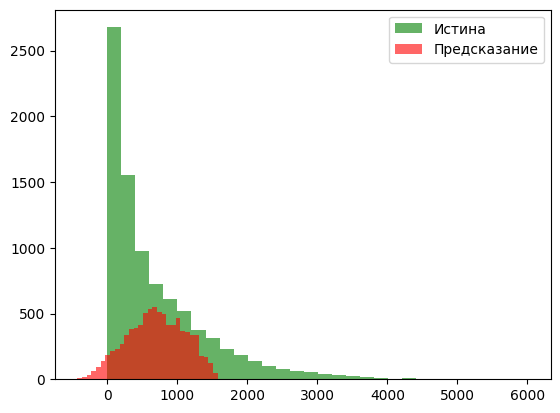

In [76]:
import matplotlib.pyplot as plt

# fig, (ax1, ax2) = plt.subplots(1, 2)
plt.hist(bikes["Total"], bins=30, alpha=0.6, color="green", label="Истина")
plt.hist(bikes["PredictedTotal2"], bins=30, alpha=0.6, color="red", label="Предсказание")
plt.legend()

Предсказанные количества (красный) все от -100 до 1500, чаще всего это числа около 700. 
  Модель предсказывает однообразно!

Обратите внимание, что есть отрицательные значения 
  (сама регрессия этого не ограничивает, только мы понимаем, что такого — отрицательных количеств — у нас быть не может).

Хорошо бы добавить категориальные переменные, например рабочий ли день `Functioning Day` )).

#### Total ~ Temperature + Hour + FunctioningDay

In [77]:
# сперва переименуем
bikes = bikes.rename({"Functioning Day": "FunctioningDay"}, axis=1)
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Partner 1,Partner 2,Total,PredictedTotal2,PredictedTotal3
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50,257,-144.938,-125.982
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80,219,-120.970,-102.470
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140,162,-102.270,-84.350
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105,148,-75.668,-58.142
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38,97,-38.530,-21.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,467,177,644,708.188,727.842
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,296,63,359,718.986,737.874
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,571,665,1236,729.784,747.906
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,171,457,628,748.484,766.026


In [78]:
results = smf.ols(
    'Total ~ Temperature + Hour + FunctioningDay', data=bikes
).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     1402.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:24:04   Log-Likelihood:                -67287.
No. Observations:                8581   AIC:                         1.346e+05
Df Residuals:                    8577   BIC:                         1.346e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -789.01

In [79]:
results.params

Intercept               -789.016517
FunctioningDay[T.Yes]    803.231422
Temperature               26.962118
Hour                      31.596925
dtype: float64

In [80]:
print(f"Total = {results.params.Intercept} "
      f"+ {results.params.Temperature} * Temperature "
      f"+ {results.params.Hour} * Hour "
      f"+ {results.params.loc['FunctioningDay[T.Yes]']} * FunctiongDay[=Yes] "
)
print(f"Total = {round(results.params.Intercept, 2)} "
      f"+ {round(results.params.Temperature, 2)} * Temperature "
      f"+ {round(results.params.Hour, 2)} * Hour "
      f"+ {round(results.params.loc['FunctioningDay[T.Yes]'], 2)} * FunctiongDay[=Yes] "
)

Total = -789.0165167297456 + 26.962118011110157 * Temperature + 31.596924862662206 * Hour + 803.2314221550456 * FunctiongDay[=Yes] 
Total = -789.02 + 26.96 * Temperature + 31.6 * Hour + 803.23 * FunctiongDay[=Yes] 


In [81]:
bikes["PredictedTotal3"] = -789.02 + 26.96 * bikes["Temperature"] + 31.6 * bikes["Hour"] + 803.23 * (bikes["FunctioningDay"] == "Yes")
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Partner 1,Partner 2,Total,PredictedTotal2,PredictedTotal3
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50,257,-144.938,-125.982
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80,219,-120.970,-102.470
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140,162,-102.270,-84.350
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105,148,-75.668,-58.142
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38,97,-38.530,-21.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,467,177,644,708.188,727.842
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,296,63,359,718.986,737.874
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,571,665,1236,729.784,747.906
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,171,457,628,748.484,766.026


Раньше для нерабочих дней предсказывалось разное, сейчас в основном отрицательные значения

In [84]:
bikes[bikes["FunctioningDay"] == "No"]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Partner 1,Partner 2,Total,PredictedTotal2,PredictedTotal3
3144,11/04/2018,0,14.4,82,4.6,0.0,0.0,Spring,No Holiday,No,0,0,0,371.326,-400.796
3145,11/04/2018,1,13.6,81,3.6,0.0,0.0,Spring,No Holiday,No,0,0,0,382.124,-390.764
3146,11/04/2018,2,NaN,80,3.9,0.0,0.0,Spring,No Holiday,No,0,0,0,NaN,NaN
3147,11/04/2018,3,11.6,81,3.1,0.0,0.0,Spring,No Holiday,No,0,0,0,393.184,-381.484
3148,11/04/2018,4,10.2,83,3.5,0.0,0.0,Spring,No Holiday,No,0,0,0,388.178,-387.628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,19,11.9,71,2.7,0.0,0.0,Autumn,No Holiday,No,0,0,0,911.006,132.204
8252,09/11/2018,20,11.9,72,2.5,0.0,0.0,Autumn,No Holiday,No,0,0,0,942.876,163.804
8253,09/11/2018,21,11.4,74,1.9,0.0,0.0,Autumn,No Holiday,No,0,0,0,961.576,181.924
8254,09/11/2018,22,11.2,75,1.7,0.0,0.0,Autumn,No Holiday,No,0,0,0,988.178,208.132


In [ ]:
results.params

Intercept               -789.016517
FunctioningDay[T.Yes]    803.231422
Temperature               26.962118
Hour                      31.596925
dtype: float64

Итак, коэффициенты значат, что...

- FunctioningDay[T.Yes] = $803.23$ значит, что когда день рабочий, то берут на 803 велосипеда больше, чем в нерабочий  
  (такая математика... мы-то понимаем, что в нерабочий всегда 0)
- Intercept = $-789$, что когда всё остальное 0, т.е. температура 0 и час 0 и день нерабочий, то в среднем берут -789 велосипедов 🤯
- $w_\text{Temperature} = 26.96$, что когда температура повышается на градус берут, в среднем, на 26.96 велосипедов больше 
- $w_\text{Hour} = 31.60$, что когда час повышается на час берут, в среднем, на 31.6 велосипедов больше 

**Час — очевидный кандидат на превращение в категориальную переменную**

Так или иначе, стало ли распределение сейчас лучше?

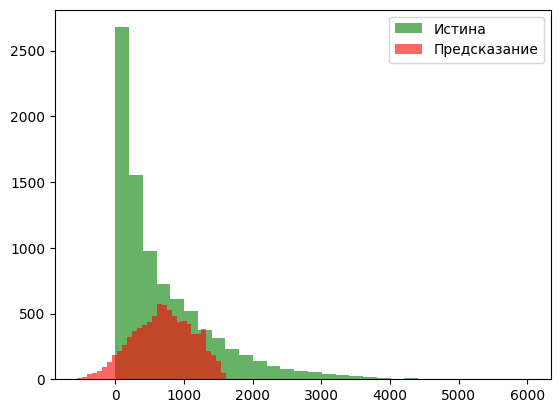

In [85]:
import matplotlib.pyplot as plt

# fig, (ax1, ax2) = plt.subplots(1, 2)
plt.hist(bikes["Total"], bins=30, alpha=0.6, color="green", label="Истина")
plt.hist(bikes["PredictedTotal3"], bins=30, alpha=0.6, color="red", label="Предсказание")
plt.legend()

Не очень понятно, как будто особо не поменялось...

#### Total ~ Temperature + HourCat + FunctioningDay

Превратим час в категорию

<Axes: title={'center': 'Total'}, xlabel='Hour'>

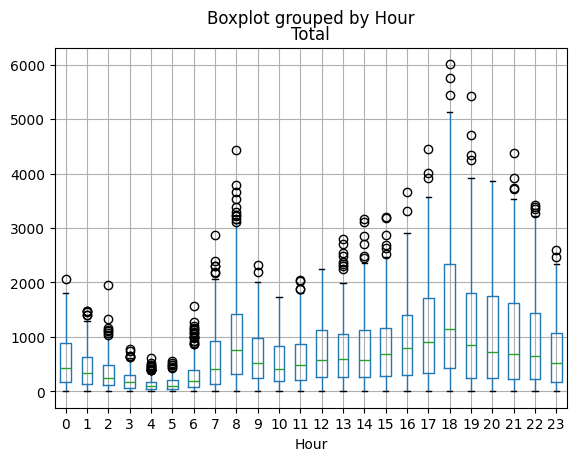

In [89]:
bikes.boxplot("Total", by="Hour")

In [102]:
HourCat = pd.cut(
    bikes["Hour"],
    [0, 7, 9, 18, 21, 24],
    labels=["night", "morning-commute", "work", "evening-commute", "evening"],
    include_lowest=True,
    # ordered=False
)
bikes["HourCat"] = HourCat

bikes[["Hour", "HourCat"]]

,Hour,HourCat
0,0,night
1,1,night
2,2,night
3,3,night
4,4,night
...,...,...
8755,19,evening-commute
8756,20,evening-commute
8757,21,evening-commute
8758,22,evening


In [103]:
results = smf.ols(
    'Total ~ Temperature + HourCat + FunctioningDay', data=bikes
).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     719.5
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:43:31   Log-Likelihood:                -67250.
No. Observations:                8581   AIC:                         1.345e+05
Df Residuals:                    8574   BIC:                         1.346e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [104]:
results.params

Intercept                    -719.856988
HourCat[T.morning-commute]    467.901566
HourCat[T.work]               371.850687
HourCat[T.evening-commute]    656.272594
HourCat[T.evening]            404.854507
FunctioningDay[T.Yes]         802.784667
Temperature                    26.967010
dtype: float64

In [107]:


print(f"Total = {results.params.Intercept} "
      f"+ {results.params.Temperature} * Temperature "
      f"+ {results.params.loc['HourCat[T.morning-commute]']} * HourCat[T.morning-commute] "
      f"+ {results.params.loc['HourCat[T.work]']} * HourCat[T.work] "
      f"+ {results.params.loc['HourCat[T.evening-commute]']} * HourCat[T.evening-commute] "
      f"+ {results.params.loc['HourCat[T.evening]']} * HourCat[T.evening] "
      f"+ {results.params.loc['FunctioningDay[T.Yes]']} * FunctiongDay[=Yes] "
)
print(f"Total = {results.params.Intercept} "
      f"+ {round(results.params.Temperature, 2)} * Temperature "
      f"+ {round(results.params.loc['HourCat[T.morning-commute]'], 2)} * HourCat[T.morning-commute] "
      f"+ {round(results.params.loc['HourCat[T.work]'], 2)} * HourCat[T.work] "
      f"+ {round(results.params.loc['HourCat[T.evening-commute]'], 2)} * HourCat[T.evening-commute] "
      f"+ {round(results.params.loc['HourCat[T.evening]'], 2)} * HourCat[T.evening] "
      f"+ {round(results.params.loc['FunctioningDay[T.Yes]'], 2)} * FunctiongDay[=Yes] "
)

Total = -719.8569880371184 + 26.96700990807263 * Temperature + 467.9015663284492 * HourCat[T.morning-commute] + 371.8506866336138 * HourCat[T.work] + 656.2725938516267 * HourCat[T.evening-commute] + 404.8545074338631 * HourCat[T.evening] + 802.7846671578114 * FunctiongDay[=Yes] 
Total = -719.8569880371184 + 26.97 * Temperature + 467.9 * HourCat[T.morning-commute] + 371.85 * HourCat[T.work] + 656.27 * HourCat[T.evening-commute] + 404.85 * HourCat[T.evening] + 802.78 * FunctiongDay[=Yes] 


In [109]:
bikes["PredictedTotal4"] = (
    -719.8569880371184
    + 26.97 * bikes["Temperature"]
    + 467.9 * (bikes["HourCat"] == "morning-commute")
    + 371.85 * (bikes["HourCat"] == "work")
    + 656.27 * (bikes["HourCat"] == "evening-commute")
    + 404.85 * (bikes["HourCat"] == "evening")
    + 802.78 * (bikes["FunctioningDay"] == "Yes")
)


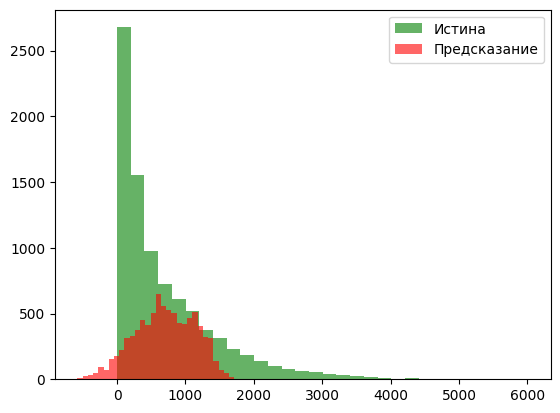

In [111]:
import matplotlib.pyplot as plt

plt.hist(bikes["Total"], bins=30, alpha=0.6, color="green", label="Истина")
plt.hist(bikes["PredictedTotal4"], bins=30, alpha=0.6, color="red", label="Предсказание")
plt.legend()

Как будто немного лучше, но не сильно.
Можно пробовать разные комбинации (по-хорошему, они выбираются по информации из большой таблицы `.summary()`)
Также независимой переменной может быть бинарная.

#### Бинарная независимая переменная FunctioningDay ~ Total

In [115]:
bikes["FunctioningDayBin"]

0       True
1       True
2       True
3       True
4       True
        ... 
8755    True
8756    True
8757    True
8758    True
8759    True
Name: FunctioningDayBin, Length: 8760, dtype: bool

In [119]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               8760 non-null   object  
 1   Hour               8760 non-null   int64   
 2   Temperature        8581 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind speed         8760 non-null   float64 
 5   Rainfall           8760 non-null   float64 
 6   Snowfall           8760 non-null   float64 
 7   Seasons            8760 non-null   object  
 8   Holiday            8760 non-null   object  
 9   FunctioningDay     8760 non-null   object  
 10  Partner 1          8760 non-null   int64   
 11  Partner 2          8760 non-null   int64   
 12  Total              8760 non-null   int64   
 13  PredictedTotal2    8581 non-null   float64 
 14  PredictedTotal3    8581 non-null   float64 
 15  HourCat            8760 non-null   category
 16  Predic

In [124]:
bikes["FunctioningDayBin"] = (bikes["FunctioningDay"] == "Yes").astype("int")
logit_results = smf.logit("FunctioningDayBin ~ Total", data=bikes).fit()

logit_results.summary()

         Current function value: 0.001916
         Iterations: 35


c:\prog\python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      FunctioningDayBin   No. Observations:                 8760
Model:                          Logit   Df Residuals:                     8758
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.9870
Time:                        04:05:22   Log-Likelihood:                -16.780
converged:                      False   LL-Null:                       -1290.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5884      0.580     -7.907      0.000      -5.726      -3.451
Total         22.3200   4090.897      0.005      0.996   -7995.690    8040.330
==============================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [125]:
logit_results.params


Intercept    -4.588363
Total        22.320014
dtype: float64

*Требует дальнейшего описания*